# House Price Predictions using Analytics

This dataset analysis will be done using the help of Regression in order to predict the house prices in King County, USA.

The following features are in the dataset
* id - House ID
* date - The date the house was sold
* price - The price of the house (Also the regressor of the analytics problem)
* bedrooms - No. of Bedrooms
* Bathrooms - 2.25
* sqft_living - Size of living room in sq.ft
* sqft_lot - Size of lot in sq.ft
* floors - Total floors in the house
* waterfront  - House which has a view to the waterfront 
* view - Has the house been viewed
* condition - How good is the overall condition
* grade - Overall grade given to the house by the King County grading system
* sqft_above - Sqft. of area above the house (roof)
* sqft_basement - Sqft. of area in the basement
* yr_built - The year it was built 
* yr_renovated - The year when the house was renovated
* zipcode - Zipcode of the house
* lat - Latitude
* long - Longitude
* sqft_living15 - Living room area in 2015
* sqft_lot15 - Lot room area in 2015

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import rpy2
import seaborn as sns
import sklearn as sk
from sympy import *
import scipy
import random
%load_ext rpy2.ipython
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pd.set_option('display.max_columns', 500)

In [431]:
df = pd.read_csv('file:///Users/Sauraj/Downloads/kc_house_data.csv')
df

id             date      price  bedrooms  bathrooms  \
0      7129300520  20141013T000000   221900.0         3       1.00   
1      6414100192  20141209T000000   538000.0         3       2.25   
2      5631500400  20150225T000000   180000.0         2       1.00   
3      2487200875  20141209T000000   604000.0         4       3.00   
4      1954400510  20150218T000000   510000.0         3       2.00   
5      7237550310  20140512T000000  1230000.0         4       4.50   
6      1321400060  20140627T000000   257500.0         3       2.25   
7      2008000270  20150115T000000   291850.0         3       1.50   
8      2414600126  20150415T000000   229500.0         3       1.00   
9      3793500160  20150312T000000   323000.0         3       2.50   
10     1736800520  20150403T000000   662500.0         3       2.50   
11     9212900260  20140527T000000   468000.0         2       1.00   
12      114101516  20140528T000000   310000.0         3       1.00   
13     6054650070  20141007T000000   400000.0         3       1.75   
14     1175000570  20150312T000000   530000.0         5       2.00   
15     9297300055  20150124T000000   650000.0         4       3.00   
16     1875500060  20140731T000000   395000.0         3       2.00   
17     6865200140  20140529T000000   485000.0         4       1.00   
18       16000397  20141205T000000   189000.0         2       1.00   
19     7983200060  20150424T000000   230000.0         3       1.00   
20     6300500875  20140514T000000   385000.0         4       1.75   
21     2524049179  20140826T000000  2000000.0         3       2.75   
22     7137970340  20140703T000000   285000.0         5       2.50   
23     8091400200  20140516T000000   252700.0         2       1.50   
24     3814700200  20141120T000000   329000.0         3       2.25   
25     1202000200  20141103T000000   233000.0         3       2.00   
26     1794500383  20140626T000000   937000.0         3       1.75   
27     3303700376  20141201T000000   667000.0         3       1.00   
28     5101402488  20140624T000000   438000.0         3       1.75   
29     1873100390  20150302T000000   719000.0         4       2.50   
...           ...              ...        ...       ...        ...   
21583  2025049203  20140610T000000   399950.0         2       1.00   
21584   952006823  20141202T000000   380000.0         3       2.50   
21585  3832050760  20140828T000000   270000.0         3       2.50   
21586  2767604724  20141015T000000   505000.0         2       2.50   
21587  6632300207  20150305T000000   385000.0         3       2.50   
21588  2767600688  20141113T000000   414500.0         2       1.50   
21589  7570050450  20140910T000000   347500.0         3       2.50   
21590  7430200100  20140514T000000  1220000.0         4       3.50   
21591  4140940150  20141002T000000   572000.0         4       2.75   
21592  1931300412  20150416T000000   475000.0         3       2.25   
21593  8672200110  20150317T000000  1090000.0         5       3.75   
21594  5087900040  20141017T000000   350000.0         4       2.75   
21595  1972201967  20141031T000000   520000.0         2       2.25   
21596  7502800100  20140813T000000   679950.0         5       2.75   
21597   191100405  20150421T000000  1580000.0         4       3.25   
21598  8956200760  20141013T000000   541800.0         4       2.50   
21599  7202300110  20140915T000000   810000.0         4       3.00   
21600   249000205  20141015T000000  1540000.0         5       3.75   
21601  5100403806  20150407T000000   467000.0         3       2.50   
21602   844000965  20140626T000000   224000.0         3       1.75   
21603  7852140040  20140825T000000   507250.0         3       2.50   
21604  9834201367  20150126T000000   429000.0         3       2.00   
21605  3448900210  20141014T000000   610685.0         4       2.50   
21606  7936000429  20150326T000000  1010000.0         4       3.50   
21607  2997800021  20150219T000000   475000.0         3       2.50   
21608   263000018  201405

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [337]:
df.zipcode.value_counts(bins=5)

(98000.80099999999, 98040.6]    7241
(98040.6, 98080.2]              5044
(98080.2, 98119.8]              4610
(98119.8, 98159.4]              2945
(98159.4, 98199.0]              1773
Name: zipcode, dtype: int64

# Exploratory Data Analysis

Text(0.5,0,'Grade of the house')

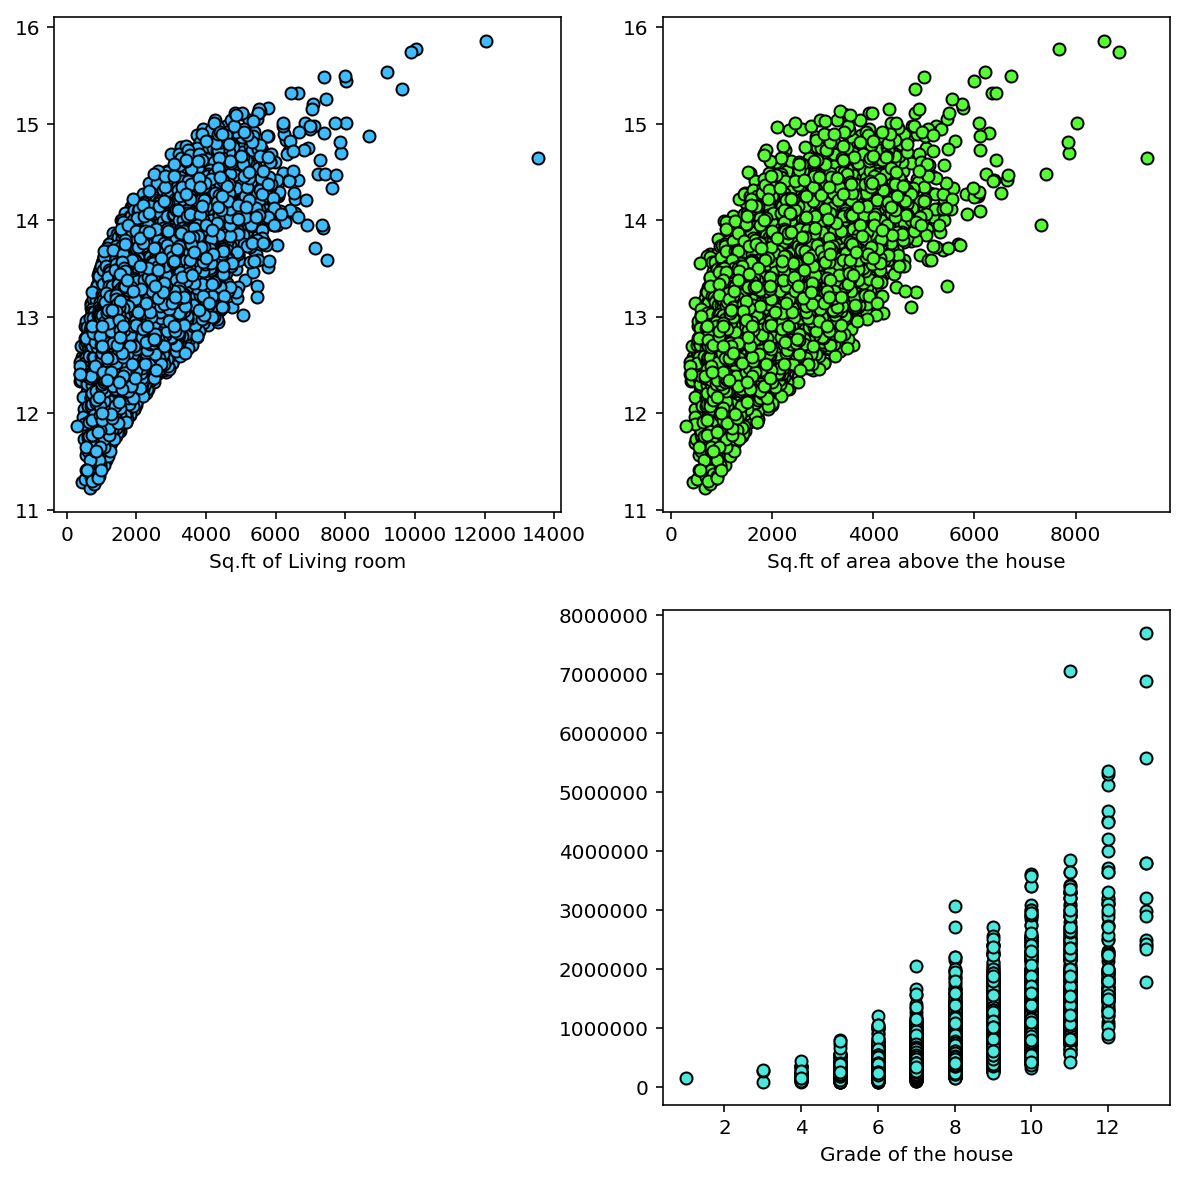

In [384]:
fig = plt.figure(figsize=(10,10))

ax1 = plt.subplot2grid((2, 2), (0,0))
plt.scatter(df.sqft_living, np.log1p(df.price), edgecolors='black', color='#3EBCFF')
plt.xlabel('Sq.ft of Living room')

ax2 = plt.subplot2grid((2, 2), (0, 1))
plt.scatter(df.sqft_above, np.log1p(df.price), edgecolors='black', c='#55FF33')
plt.xlabel('Sq.ft of area above the house')

#ax3 = plt.subplot2grid((2, 2), (1, 0))
#sns.regplot(x='price', y='waterfront', data=df, logistic=True, color='#FFD433')
#plt.xlabel('Price of the house')

ax4 = plt.subplot2grid((2, 2), (1, 1))
plt.scatter(df.grade, df.price, edgecolors='black', color='#4BE9DD')
plt.xlabel('Grade of the house')

Text(0.5,0,'Number of Bathrooms')

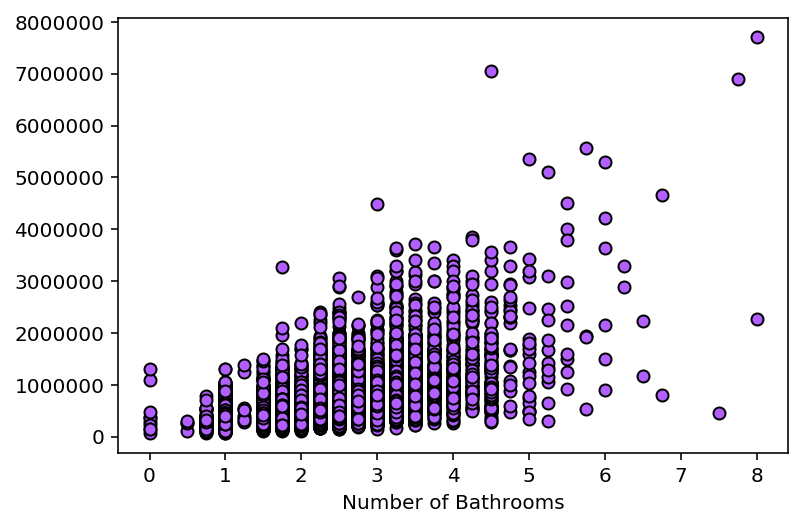

In [385]:
plt.scatter(df.bathrooms, df.price, edgecolors='black', color='#B15FFF')
plt.xlabel('Number of Bathrooms')

In [ ]:
figure = plt.figure(figsize=(10,10))

ax1 = plt.subplot2grid((2, 2), (0, 0))
plt.hist(np.log1p(df.price), edgecolor='black')
plt.xlabel('Log transformed house prices')

ax2 = plt.subplot2grid((2, 2), (0, 1))
plt.hist(df.sqft_living, edgecolor='black', color='#C4F272')
plt.xlabel('Square feet area of Living room')

ax3 = plt.subplot2grid((2, 2), (1, 0))
plt.hist(df.grade, edgecolor='black', color='#AD5DDE')
plt.xlabel('Overall grading of the houses')

ax4 = plt.subplot2grid((2, 2), (1, 1))
plt.hist(df.sqft_above, edgecolor='black',color='#E96092')
plt.xlabel('Square feet area above the house ')

Text(0.5,0,'Square feet area above the house ')

In [ ]:
print('A majority of houses in the area lie between', np.exp(12.6))
print('and', np.exp(13.2))

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot = True,fmt = ".2f",cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)

### Some inferences drawn from the EDA
* The price of the house is moderately correlated with **sqft_living**, **grade**, **sqft_above**, **bathrooms** and **sqft_living15**
* A majority of houses in the area lie between **296558.60** and **540364.90**
* Right-skewness is demonstrated in the **sq_ft** and **sq_ftabove** features
* Some of the features have a polynomial shape in their regression with compared to **price**

In [ ]:
df.head(1)

# Data Preprocessing

In [432]:
#Drop the features which are not needed anymore
df = df.drop(['id', 'date'], axis=1)

In [433]:
#Next, change the yr_renovated to binary '0' and '1' acordingly
df['yr_renovated'] = df['yr_renovated'].apply(lambda x:1 if x > 0 else 0)

In [434]:
#lastly, change the sqft_basement to binary '0' and '1' to encode if basement is present or not
df['sqft_basement'] = df['sqft_basement'].apply(lambda x:1 if x > 0 else 0)

In [101]:
df.iloc[[12777]]

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
12777  2280000.0         7        8.0        13540    307752     3.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
12777           0     4          3     12        9410              1   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
12777      1999             0    98053  47.6675 -121.986           4850   

       sqft_lot15  
12777      217800

In [435]:
#Removing the outlier value of 8 bathrooms with a price of 2.28M
alpha = df[df.bathrooms == 8]
df = df.drop(df.index[12777])

In [436]:
#Bathroom values are odd since bathroom can't be a decimal unit, hence it needs to be rounded off to its nearest value
df['bathrooms'] = df['bathrooms'].round()

In [437]:
#Floors go the same treatment as of bathrooms
df['floors'] = df['floors'].round()

### Zipcodes have a unique problem as a lot of these zipcodes are arbitrary numbers which just specify the location of the house, but in a regression analysis, they can significantly impact the data analysis since their values can pose an imminent problem on the interpretation ot the regression model.

In [438]:
#First, segregate the zipcodes into various bins
df.zipcode.value_counts(bins=5)

(98000.80099999999, 98040.6]    7241
(98040.6, 98080.2]              5043
(98080.2, 98119.8]              4610
(98119.8, 98159.4]              2945
(98159.4, 98199.0]              1773
Name: zipcode, dtype: int64

#### Each of these 5 bins shall be encoded in the dataset and then One-hot encoding shall be done on them 

In [439]:
bins = [98000, 98040, 98080, 98120, 98160, 98200]
labels=[1,2,3,4,5]
df['zipcodes'] = pd.cut(df['zipcode'], bins=bins, labels=labels, include_lowest=True)

### The original zipcodes column can be removed 

In [440]:
df = df.drop(['zipcode'], axis=1)

In [442]:
#One-hot encoding of the new zipcode features and concatenating it into the main dataframe
#df_dummies = pd.get_dummies(df['zipcodes'], prefix=['zipcoderegion'])
#df = pd.concat([df, df_dummies], axis=1)
df.head(5)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3        1.0         1180      5650     1.0           0   
1  538000.0         3        2.0         2570      7242     2.0           0   
2  180000.0         2        1.0          770     10000     1.0           0   
3  604000.0         4        3.0         1960      5000     1.0           0   
4  510000.0         3        2.0         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170              1      1951             1   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050              1      1965             0   
4     0          3      8        1680              0      1987             0   

       lat     long  sqft_living15  sqft_lot15 zipcodes  ['zipcoderegion']_1  \
0  47.5112 -122.257           1340        5650        5                    0   
1  47.7210 -122.319           1690        7639        4                    0   
2  47.7379 -122.233           2720        8062        1                    1   
3  47.5208 -122.393           1360        5000        4                    0   
4  47.6168 -122.045           1800        7503        2                    0   

   ['zipcoderegion']_2  ['zipcoderegion']_3  ['zipcoderegion']_4  \
0                    0                    0                    0   
1                    0                    0                    1   
2                    0                    0                    0   
3                    0                    0                    1   
4                    1                    0                    0   

   ['zipcoderegion']_5  
0                    1  
1                    0  
2                    0  
3                    0  
4                    0

In [443]:
#Finally, remove the newly made zipcodes column
df = df.drop(['zipcodes'], axis=1)

In [351]:
df.head(5)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3        1.0         1180      5650     1.0           0   
1  538000.0         3        2.0         2570      7242     2.0           0   
2  180000.0         2        1.0          770     10000     1.0           0   
3  604000.0         4        3.0         1960      5000     1.0           0   
4  510000.0         3        2.0         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170              1      1951             1   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050              1      1965             0   
4     0          3      8        1680              0      1987             0   

       lat     long  sqft_living15  sqft_lot15  ['zipcoderegion']_1  \
0  47.5112 -122.257           1340        5650                    0   
1  47.7210 -122.319           1690        7639                    0   
2  47.7379 -122.233           2720        8062                    1   
3  47.5208 -122.393           1360        5000                    0   
4  47.6168 -122.045           1800        7503                    0   

   ['zipcoderegion']_2  ['zipcoderegion']_3  ['zipcoderegion']_4  \
0                    0                    0                    0   
1                    0                    0                    1   
2                    0                    0                    0   
3                    0                    0                    1   
4                    1                    0                    0   

   ['zipcoderegion']_5  
0                    1  
1                    0  
2                    0  
3                    0  
4                    0

In [444]:
#Encoding years now
df.yr_built.value_counts(bins=5, ascending=True)

(1899.884, 1923.0]    1804
(1923.0, 1946.0]      2440
(1969.0, 1992.0]      5309
(1946.0, 1969.0]      5805
(1992.0, 2015.0]      6254
Name: yr_built, dtype: int64

# Statistical Analysis

In [355]:
#Defining a confidence interval formula
import math
def confidence_interval(mean, stdev, sample, symbol, z):
    if symbol == 'positive':
        upper_range = mean +  z*(stdev/math.sqrt(sample))
        return upper_range
    elif symbol == 'negative':
        lower_range = mean - z*(stdev/math.sqrt(sample))
        return lower_range


In [356]:
print(confidence_interval(540000, 367100, 21613, 'positive', 1.96))
print(confidence_interval(540000, 367100, 21613, 'negative', 1.96))

544894.2137084326
535105.7862915674


In [357]:
%%R -i df
lm = lm(price~., data=df)
summary(lm)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "['zipcoderegion']_1". Fall back to string conversion. The error is: Cannot convert numpy array of unsigned values -- R does not have unsigned integers.
  (name, str(e)))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "['zipcoderegion']_2". Fall back to string conversion. The error is: Cannot convert numpy array of unsigned values -- R does not have unsigned integers.
  (name, str(e)))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "['zipcoderegion']_3". Fall back to string conversion. The error is: Cannot convert numpy array of unsigned values -- R does not have unsigned integers.
  (name, str(e))


Call:
lm(formula = price ~ ., data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1283855   -99082    -8611    77458  4257833 

Coefficients: (1 not defined because of singularities)
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -3.436e+07  1.900e+06 -18.088  < 2e-16 ***
bedrooms              -3.741e+04  1.930e+03 -19.384  < 2e-16 ***
bathrooms              4.046e+04  2.725e+03  14.847  < 2e-16 ***
sqft_living            1.559e+02  6.060e+00  25.733  < 2e-16 ***
sqft_lot               1.358e-01  4.710e-02   2.883 0.003945 ** 
floors                -1.254e+04  3.245e+03  -3.864 0.000112 ***
waterfront             6.096e+05  1.712e+04  35.613  < 2e-16 ***
view                   5.094e+04  2.113e+03  24.109  < 2e-16 ***
condition              3.038e+04  2.319e+03  13.100  < 2e-16 ***
grade                  9.059e+04  2.133e+03  42.468  < 2e-16 ***
sqft_above             3.498e+01  6.701e+00   5.220 1.80e-07 ***
sqft_basement     

##### Inferences from the Linear Model 
* **Majority of features** affect the regressor
* **F-statistic** favours the alternate hypothesis
* **R-squared** is 0.70 (rounded)
* The predictions of the houses would be off from the regression line by **201200** dollars

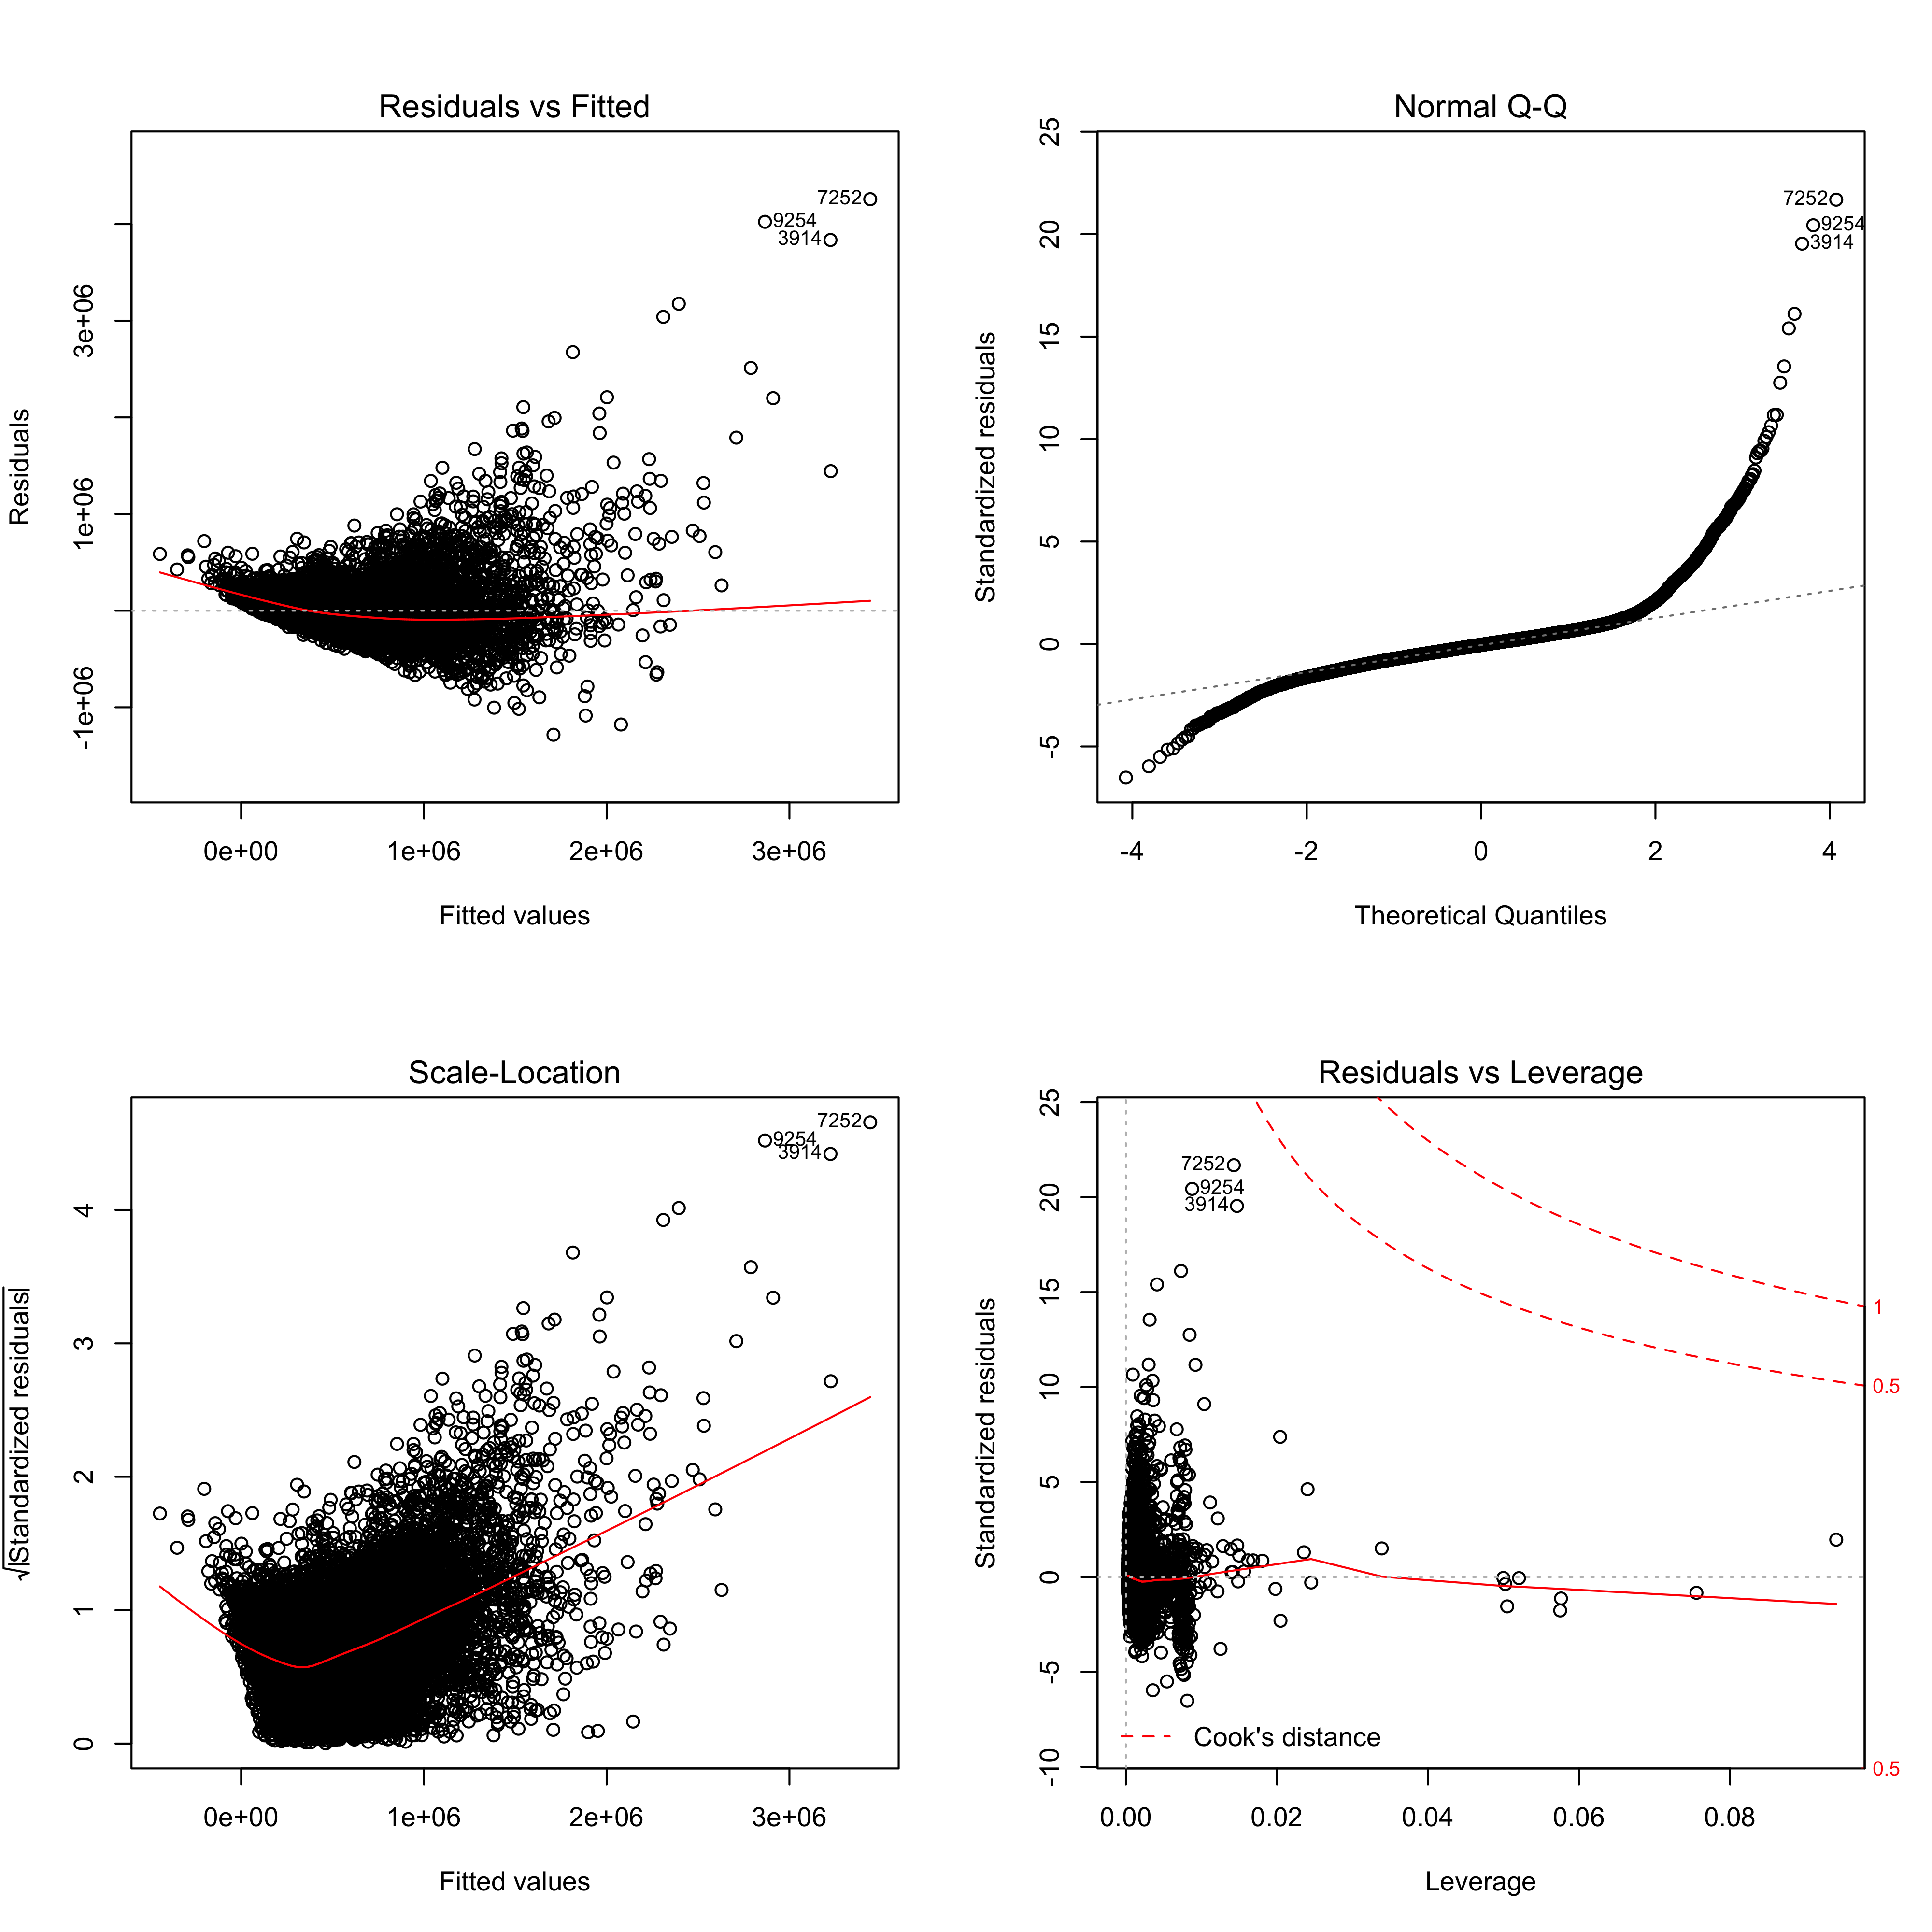

In [358]:
%%R -w 10 -h 10 --units in -r 400
par(mfrow=c(2, 2))
plot(lm)

##### Observations from the diagnostics
* Data has non-random variance and possesses **heteroscedasticity**
* Data does not have a proper degree of normality
* Residuals do not have randomness amongst them
* Three major outliers were detected, namely observation 7251, 9253 and 3913 **(Python indexing starts from '0')**

##### The best fix of this is to apply a log transformation to the regressor, price and then check for the model diagnostics

In [359]:
%%R
lm2 = lm(log(price)~., data=df)
summary(lm2)


Call:
lm(formula = log(price) ~ ., data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.37933 -0.15435  0.00251  0.15196  1.24557 

Coefficients: (1 not defined because of singularities)
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -4.712e+01  2.355e+00 -20.003  < 2e-16 ***
bedrooms              -8.726e-03  2.393e-03  -3.646 0.000266 ***
bathrooms              3.764e-02  3.378e-03  11.140  < 2e-16 ***
sqft_living            8.816e-05  7.514e-06  11.734  < 2e-16 ***
sqft_lot               4.740e-07  5.840e-08   8.117 5.05e-16 ***
floors                 4.467e-02  4.023e-03  11.104  < 2e-16 ***
waterfront             4.111e-01  2.122e-02  19.372  < 2e-16 ***
view                   6.278e-02  2.619e-03  23.967  < 2e-16 ***
condition              7.183e-02  2.876e-03  24.978  < 2e-16 ***
grade                  1.477e-01  2.645e-03  55.860  < 2e-16 ***
sqft_above             8.575e-05  8.309e-06  10.321  < 2e-16 ***
sqft_basement

Improvement was steadily noticed with the jump of **R-squared** and difference in adjusted R-squared penalty from 0.03 to 0.02, with some more new changes:

* **Sqft_basement** has become significant now
* Most of the SSE for the predictors has fallen short
* RSE is 0.2513 on the log scale

Let's check the diagnostics after the log-transformation

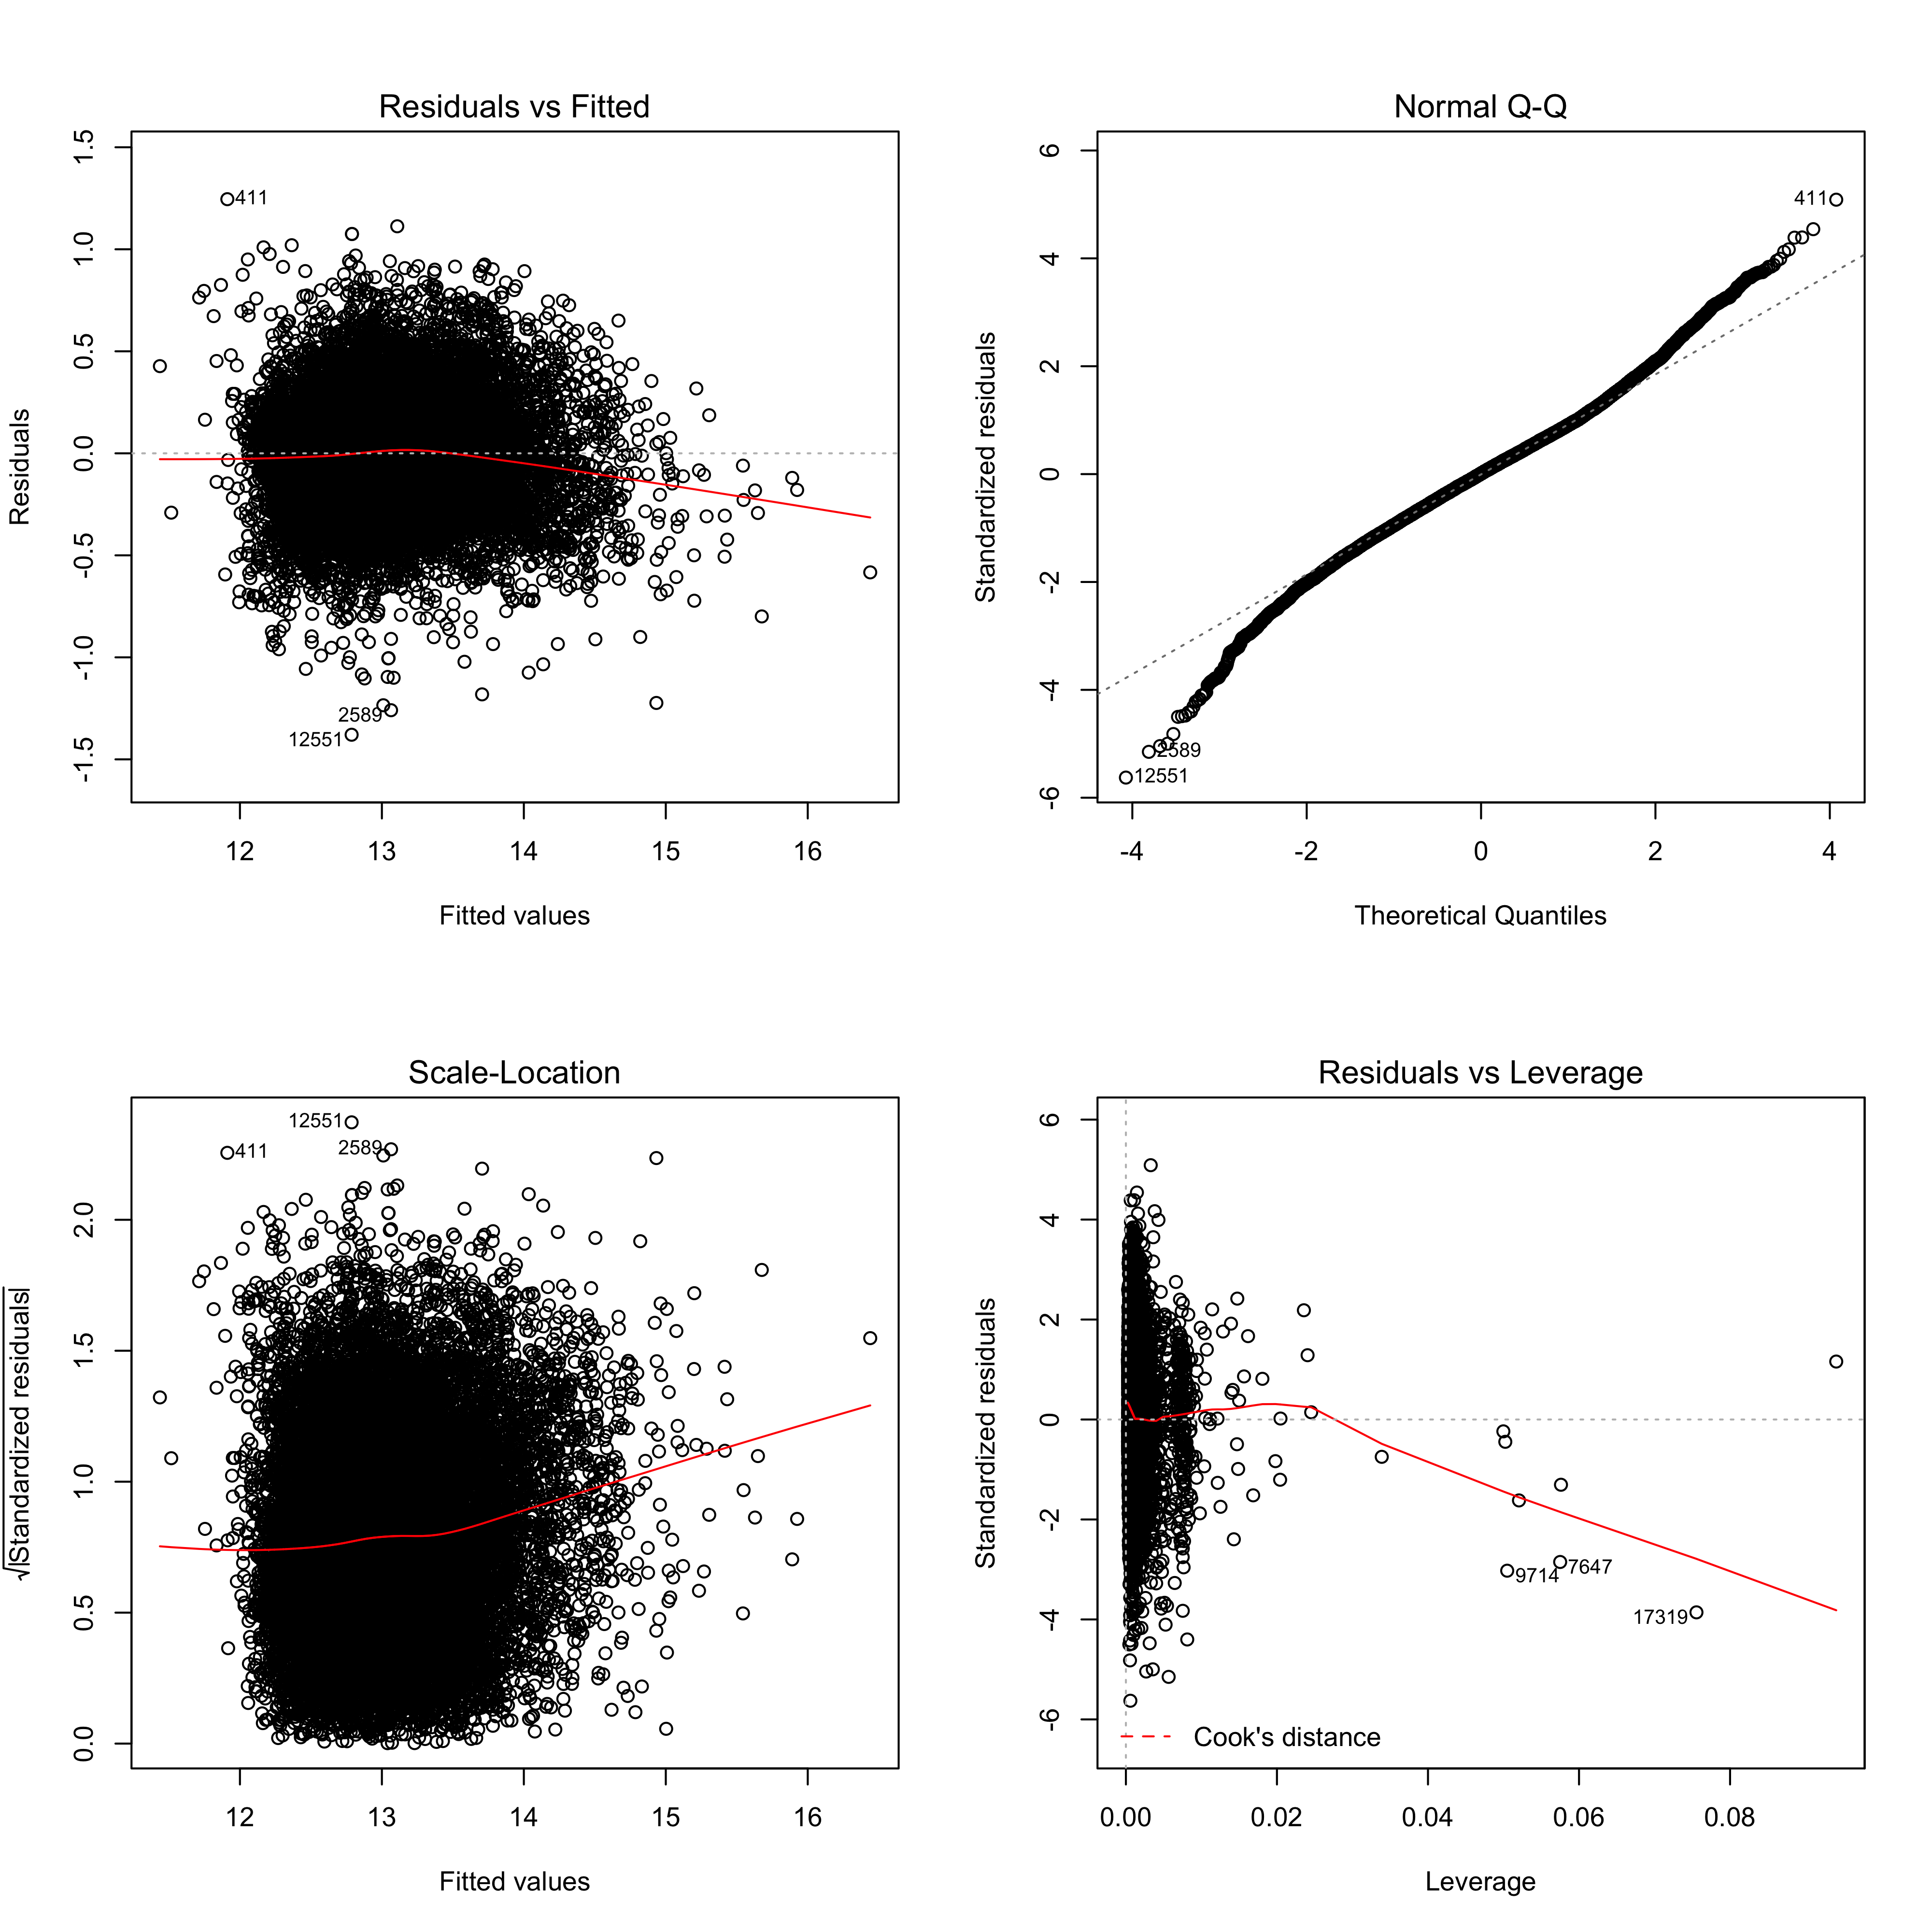

In [360]:
%%R -w 10 -h 10 --units in -r 400
par(mfrow=c(2,2))
plot(lm2)

**An immediate improvement was observed in the regression after a log-transformation was run onto the regressor**

### Let's obtain some more statistical figures from the new log-transformed model


In [361]:
%%R
print('95% Confidence intervals of all the Regression slopes in Multiple Regression')
confint(lm2, level=0.95)

[1] "95% Confidence intervals of all the Regression slopes in Multiple Regression"
                              2.5 %        97.5 %
(Intercept)           -5.173323e+01 -4.249967e+01
bedrooms              -1.341603e-02 -4.035456e-03
bathrooms              3.101539e-02  4.425937e-02
sqft_living            7.343673e-05  1.028913e-04
sqft_lot               3.595370e-07  5.884737e-07
floors                 3.678768e-02  5.255832e-02
waterfront             3.695341e-01  4.527303e-01
view                   5.764676e-02  6.791551e-02
condition              6.619071e-02  7.746333e-02
grade                  1.425503e-01  1.529180e-01
sqft_above             6.946479e-05  1.020355e-04
sqft_basement          6.600159e-02  9.124251e-02
yr_built              -2.402135e-03 -2.063471e-03
yr_renovated           8.380431e-02  1.185643e-01
lat                    1.331064e+00  1.383322e+00
long                  -1.728354e-02  5.308849e-02
sqft_living15          1.031435e-04  1.198374e-04
sqft_lot15       

In [364]:
%%R
anova1 = anova(lm2)
anova1

Analysis of Variance Table

Response: log(price)
                        Df  Sum Sq Mean Sq   F value    Pr(>F)    
bedrooms                 1  737.15  737.15 12259.571 < 2.2e-16 ***
bathrooms                1  980.25  980.25 16302.583 < 2.2e-16 ***
sqft_living              1 1249.37 1249.37 20778.347 < 2.2e-16 ***
sqft_lot                 1    3.51    3.51    58.320 2.320e-14 ***
floors                   1   32.45   32.45   539.715 < 2.2e-16 ***
waterfront               1   56.41   56.41   938.109 < 2.2e-16 ***
view                     1   94.08   94.08  1564.573 < 2.2e-16 ***
condition                1   58.18   58.18   967.515 < 2.2e-16 ***
grade                    1  352.27  352.27  5858.655 < 2.2e-16 ***
sqft_above               1   31.44   31.44   522.937 < 2.2e-16 ***
sqft_basement            1   34.30   34.30   570.489 < 2.2e-16 ***
yr_built                 1  269.86  269.86  4488.114 < 2.2e-16 ***
yr_renovated             1    0.94    0.94    15.565 7.998e-05 ***
lat          

In [363]:
%%R
library(car)
print('Test for Multicollinearity')
vif(lm2)

[1] "Test for Multicollinearity"
Error in vif.default(lm2) : there are aliased coefficients in the model


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Error in vif.default(lm2) : there are aliased coefficients in the model

  warnings.warn(x, RRuntimeWarning)


Oh blimey! This seems like a huge problem as the regression analysis detected 2 features with huge degrees of Multicollinearity, mainly **sqft_living** and **sqft_above**. But the problem which will come by directly removing them is that not only their removal will severely affect the model by increasing the **SSE** of the regressor but also increasing the deviation of predictions from the population regression and also affecting the **MSE** of the model. Hence we will have to find an alternate solution which retains these two highly collinear features and eliminates their problem.

### What all has been achieved till now?
* Heteroscedasticity has been removed through log-transformation
* Normality has been brought into the regression
* Significant impact of predictors on regressor has been established

### What next?
The next step is to find the features which impact the regression model the most. This will be calculated using the RFE algorithm from Scikit-learn and see which features really do affect the model the most.

In [365]:
#First obtain all the column names from the dataset
colnames = df.columns

In [366]:
from sklearn.preprocessing import MinMaxScaler
# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [367]:
#Third, rurn the RFE algorithm and obtain the priorities of each feature from the dataset
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lol = np.log1p(df.price)
lul = df.drop(['price'], axis=1)

lr = LinearRegression(normalize=True)
lr.fit(lul, lol)
rfe = RFE(lr, n_features_to_select=1, verbose=3)
rfe.fit(lul, lol)

ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


In [368]:
#Finally see all the priorities of the RFE
pd.DataFrame([ranks['RFE']]).T

0
['zipcoderegion']_1  0.95
['zipcoderegion']_2  1.00
['zipcoderegion']_3  0.86
['zipcoderegion']_4  0.81
bathrooms            0.19
bedrooms             0.57
condition            0.67
floors               0.71
grade                0.10
lat                  0.48
long                 0.14
price                0.38
sqft_above           0.33
sqft_basement        0.24
sqft_living          0.05
sqft_living15        0.00
sqft_lot             0.29
sqft_lot15           0.90
view                 0.52
waterfront           0.43
yr_built             0.62
yr_renovated         0.76

### Turns out the top three most important features in the linear regression model are;
* Zipcode of the house
* Floors
* Condition of the house

### The next step is to process certain predictors accordingly for the model to be built as some of the features share a non-linear relationship with the response variable 'price'

Text(0,0.5,'Log Transformed of Prices')

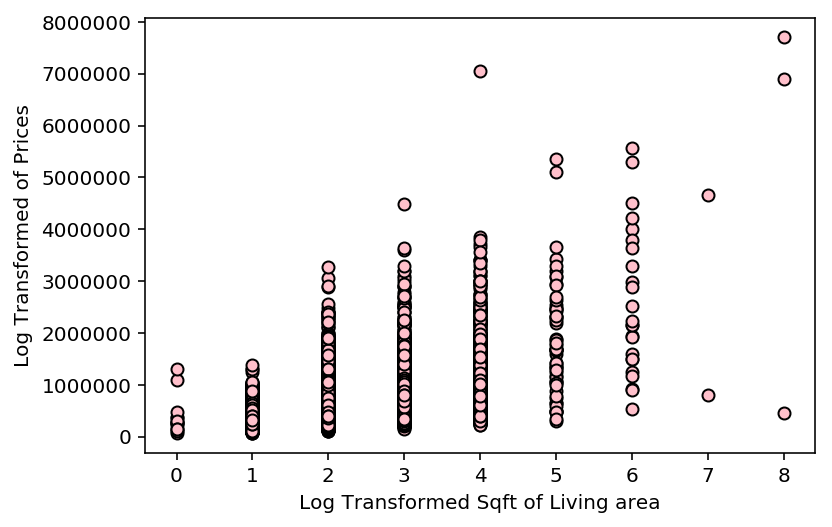

In [369]:
plt.scatter(df.bathrooms,df.price, edgecolors='black', c='pink')
plt.xlabel('Log Transformed Sqft of Living area')
plt.ylabel('Log Transformed of Prices')

In [445]:
#Transforming all the variables
df['price'] = np.log(df.price)
df['sqft_living'] = np.log(df.sqft_living)
df['sqft_above'] = np.log(df.sqft_above)
df['sqft_living15'] = np.log(df.sqft_living15)

In [371]:
%%R -i df
lm69 = lm(price~., data=df)
summary(lm69)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "['zipcoderegion']_1". Fall back to string conversion. The error is: Cannot convert numpy array of unsigned values -- R does not have unsigned integers.
  (name, str(e)))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "['zipcoderegion']_2". Fall back to string conversion. The error is: Cannot convert numpy array of unsigned values -- R does not have unsigned integers.
  (name, str(e)))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "['zipcoderegion']_3". Fall back to string conversion. The error is: Cannot convert numpy array of unsigned values -- R does not have unsigned integers.
  (name, str(e))


Call:
lm(formula = price ~ ., data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.28447 -0.15433  0.00065  0.14842  1.33501 

Coefficients: (1 not defined because of singularities)
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -5.020e+01  2.353e+00 -21.336  < 2e-16 ***
bedrooms              -2.181e-02  2.500e-03  -8.725  < 2e-16 ***
bathrooms              4.921e-02  3.288e-03  14.968  < 2e-16 ***
sqft_living            1.818e-01  1.723e-02  10.550  < 2e-16 ***
sqft_lot               4.930e-07  5.809e-08   8.485  < 2e-16 ***
floors                 2.684e-02  4.107e-03   6.534 6.53e-11 ***
waterfront             4.310e-01  2.113e-02  20.394  < 2e-16 ***
view                   6.491e-02  2.578e-03  25.177  < 2e-16 ***
condition              6.605e-02  2.868e-03  23.026  < 2e-16 ***
grade                  1.544e-01  2.548e-03  60.609  < 2e-16 ***
sqft_above             1.869e-01  1.722e-02  10.856  < 2e-16 ***
sqft_basement     

## Model Building

#### Because this dataset involves a regression problem, the next step is to build the regression model and see which ones provide with the best fit.

In [448]:
X = df.drop(['price'], axis=1)
y = df['price']

In [449]:
#First, create a training and a validation set for model building.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [450]:
from sklearn.metrics import mean_squared_error

def calc_train_error(X_train, y_train, model):
    '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return mse
    
def calc_validation_error(X_test, y_test, model):
    '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return mse
    
def calc_metrics(X_train, X_test, y_train, y_test, model):
    '''fits model and returns the RMSE for in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

### Once this splitting has been done, modules needed for regression need to be imported along with cross-validation

In [451]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import cross_val_score

In [452]:
from sklearn.metrics import r2_score
linear = LinearRegression()
linear.fit(X_train, y_train)
preds = linear.predict(X_train)
mean_squared_error(y_train, preds)

0.05962884221189279

In [453]:
y_test_preds = linear.predict(X_test)

### Model 1: Multiple Linear Regression

In [454]:
linear = LinearRegression(fit_intercept=True)
lineareg_crossval = cross_val_score(linear, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print("Average of 10-fold CV MSE:", np.mean(-(lineareg_crossval)))

Average of 10-fold CV MSE: 0.05982678161546966


In [455]:
train_error, test_error = calc_metrics(X_train, X_test, y_train, y_test, linear)
linear_r2_train = r2_score(y_train, preds)
linear_r2_test = r2_score(y_test, y_test_preds)
rmse_train_error = np.sqrt(train_error)
rmse_test_error = np.sqrt(test_error)
print("Multiple Regression Training Error:", train_error)
print("\nMultiple Regression Validation Error:", test_error)
print("\nMultiple Regression Training RMSE:", rmse_train_error)
print("\nMultiple Regression Validation RMSE:", rmse_test_error)
print("\nR-squared coefficient of Training set:", linear_r2_train)
print("\nR-squared coefficient of Validation set:", linear_r2_test)

Multiple Regression Training Error: 0.05962884221189279

Multiple Regression Validation Error: 0.06050346878022655

Multiple Regression Training RMSE: 0.24419017632143353

Multiple Regression Validation RMSE: 0.2459745287224402

R-squared coefficient of Training set: 0.7850820945513663

R-squared coefficient of Validation set: 0.7805974302999449


#### As seen above, the cross-validation provided with a score of 0.062 and and a validation score of 0.064 on the validation set

In [458]:
#Let's visualize our results this time to see how the actual and predicted variable compares to each other
y_train_pred = linear.predict(X_train)
y_test_pred = linear.predict(X_test)

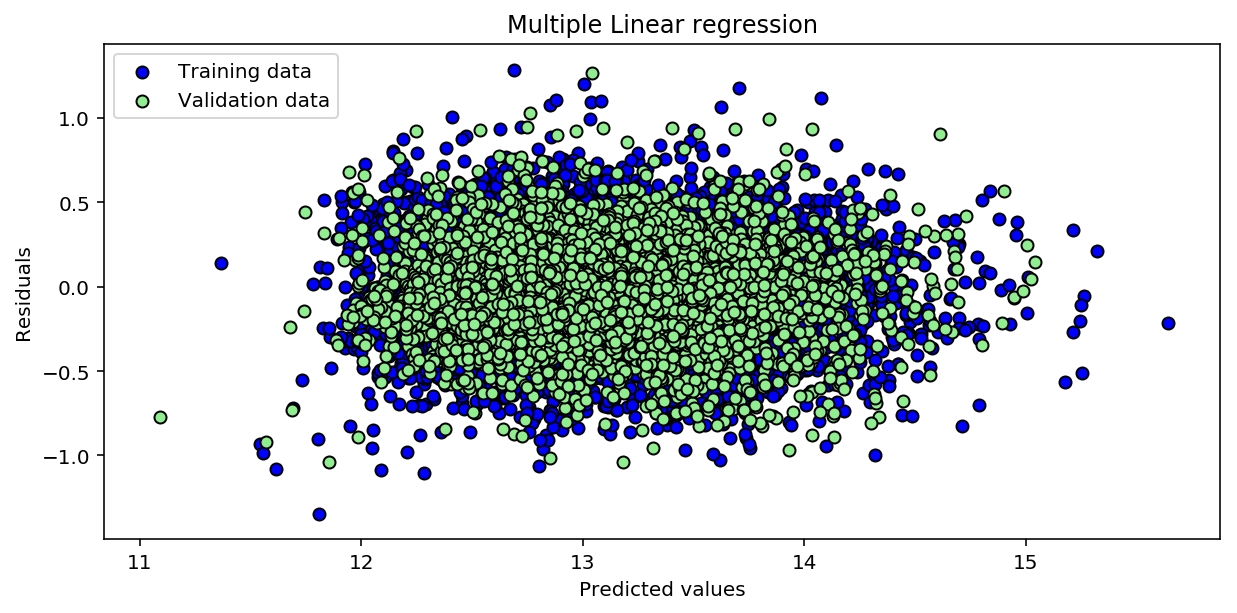

In [459]:
#Next, plot the residuals plot
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot2grid((2, 1), (0, 0))
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", edgecolors='black', label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", edgecolors='black', label = "Validation data")
plt.title("Multiple Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.show()


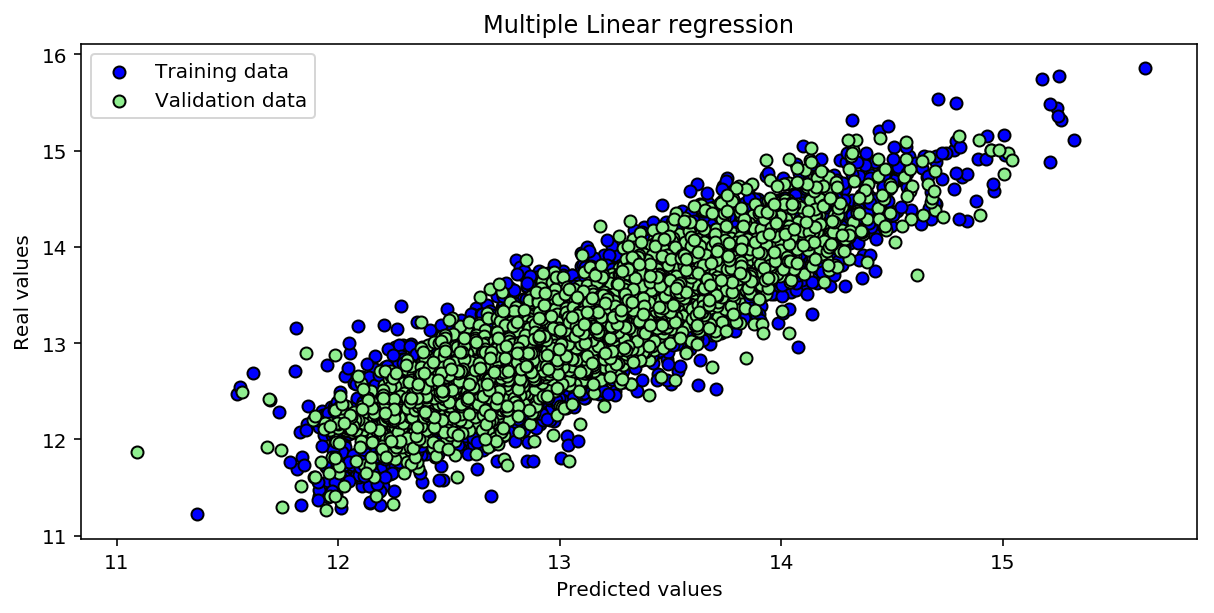

In [460]:
#Plot the Regression line 
fig = plt.figure(figsize=(10, 10))
ax2 = plt.subplot2grid((2, 1), (0, 0))
plt.scatter(y_train_pred, y_train, c = "blue",edgecolors='black', label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", edgecolors='black' , label = "Validation data")
plt.title("Multiple Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")

### Model 2: Ridge Regression

Ridge regression is a popular method of Regression which uses **L2** Regularization to shrink the coefficients to a certain degree in order to eliminate the problem of **Multicollinearity** and result in a better fit

In [461]:
#First, choose a range of alpha values
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

Best alpha : 0.3


In [462]:
print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)


Try again for more precision with alphas centered around 0.3
Best alpha : 0.33


In [464]:
#Next, fit the model
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

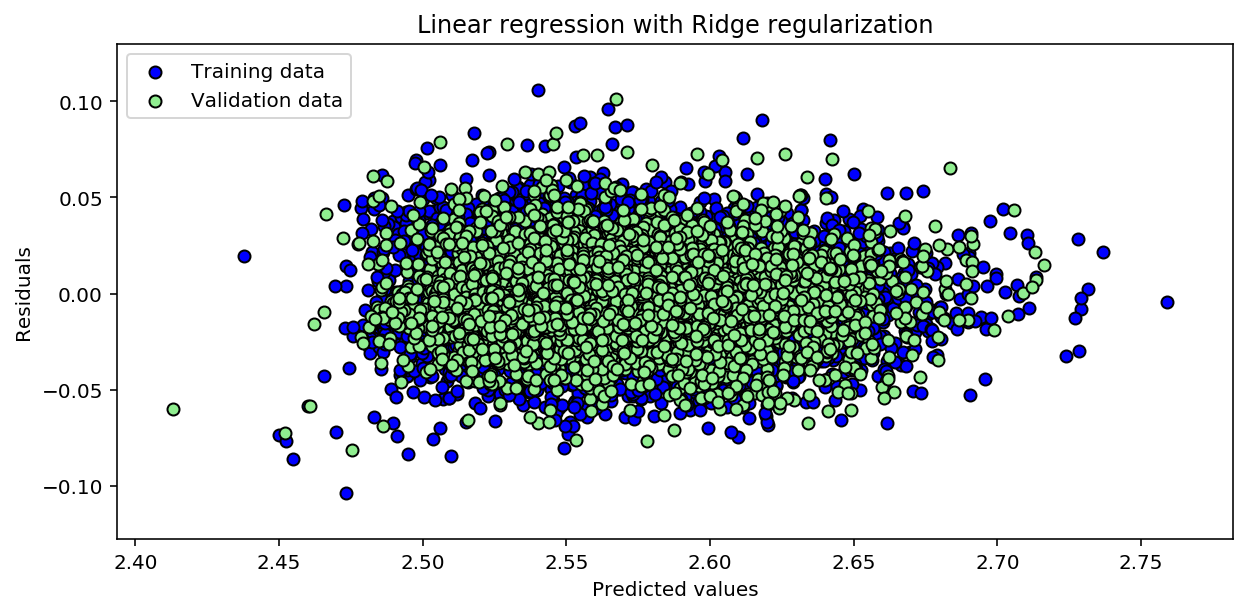

In [299]:
#Plot the residuals for Ridge regression
fig = plt.figure(figsize=(10, 10))
ax2 = plt.subplot2grid((2, 1), (0, 0))
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue", edgecolors='black', label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "lightgreen", edgecolors='black', label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")

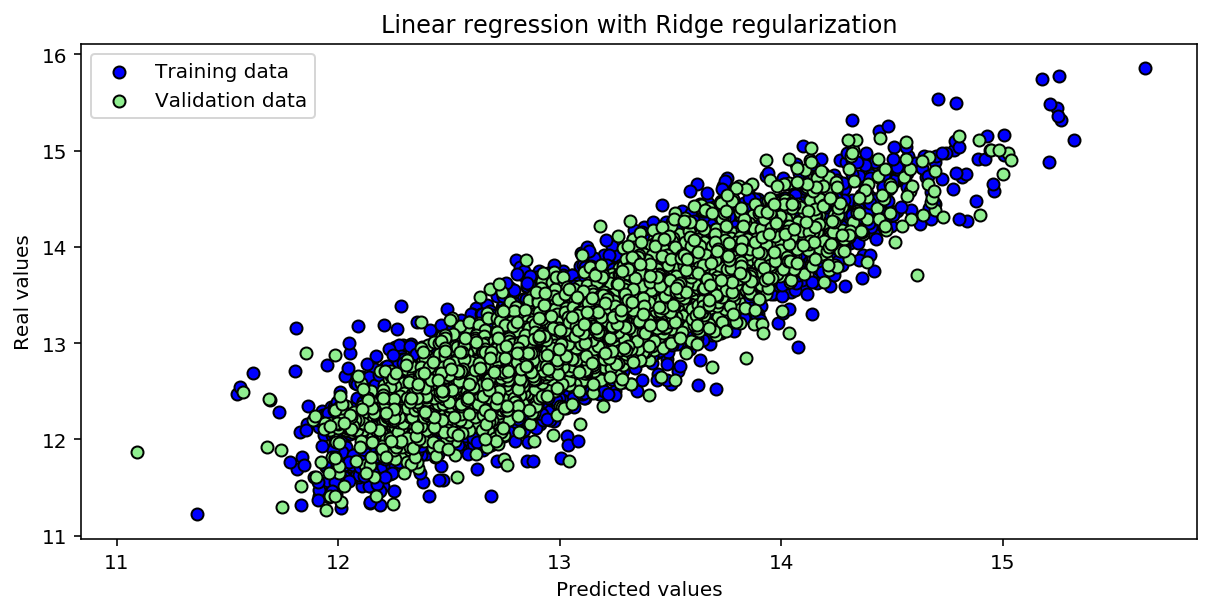

In [465]:
#Regression plot for Ridge Regression
fig = plt.figure(figsize=(10, 10))
ax2 = plt.subplot2grid((2, 1), (0, 0))
plt.scatter(y_train_rdg, y_train, c = "blue", edgecolors='black', label = "Training data")
plt.scatter(y_test_rdg, y_test, c = "lightgreen", edgecolors='black', label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")

### Turns out L2 Regularization did not do much towards the data. Let's see how Lasso works on this dataset

In [466]:
#Choose the best Lasso subsets for alpha values and obtain it using cross-validation
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)


Best alpha : 0.0001
Try again for more precision with alphas centered around 0.0001
Best alpha : 6e-05


In [467]:
#Train the model on Lasso
y_train_las = lasso.predict(X_train)
y_test_las = lasso.predict(X_test)

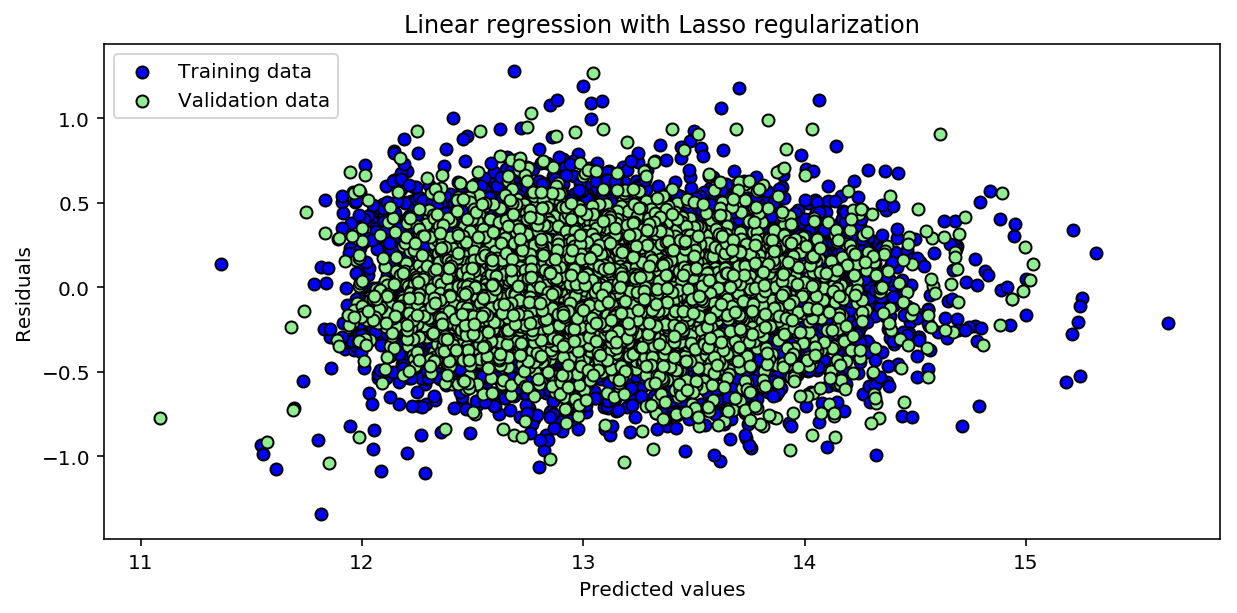

In [468]:
#Residual plot for Lasso
fig = plt.figure(figsize=(10, 10))
ax2 = plt.subplot2grid((2, 1), (0, 0))
plt.scatter(y_train_las, y_train_las - y_train, c = "blue", edgecolors='black',label = "Training data")
plt.scatter(y_test_las, y_test_las - y_test, c = "lightgreen", edgecolors='black' ,label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")

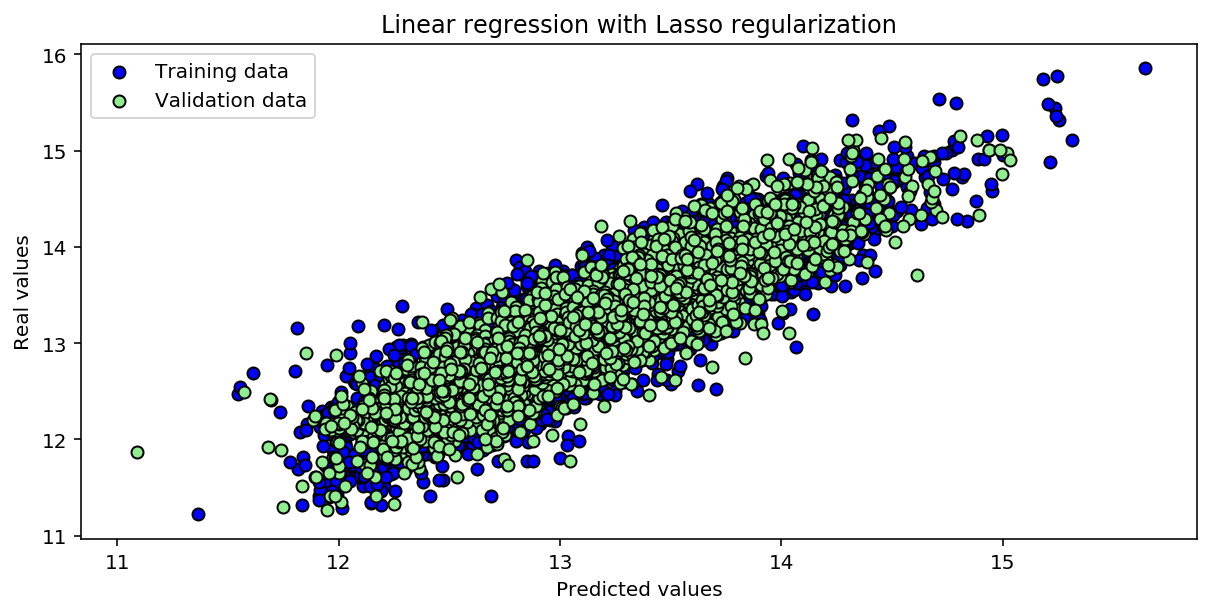

In [469]:
#Regression plot for Lasso
fig = plt.figure(figsize=(10, 10))
ax2 = plt.subplot2grid((2, 1), (0, 0))
plt.scatter(y_train_las, y_train, c = "blue", edgecolors='black', label = "Training data")
plt.scatter(y_test_las, y_test, c = "lightgreen", edgecolors='black', label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")

### Decision Tree Regression

#### Decision Tree Regression uses tree based methods to find the best estimate for the given values.

In [470]:
tree_reg = DecisionTreeRegressor(criterion='mse', max_depth=10)
tree_crossval = cross_val_score(tree_reg, X_train, y_train, cv=10 ,scoring='neg_mean_squared_error')
tree_crossval

array([-0.05168834, -0.04610767, -0.05674566, -0.04848405, -0.05222573,
       -0.05197392, -0.05145445, -0.04679477, -0.05145693, -0.04661491])

In [471]:
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [472]:
y_tree_train_pred = tree_reg.predict(X_train)
y_tree_test_pred = tree_reg.predict(X_test)

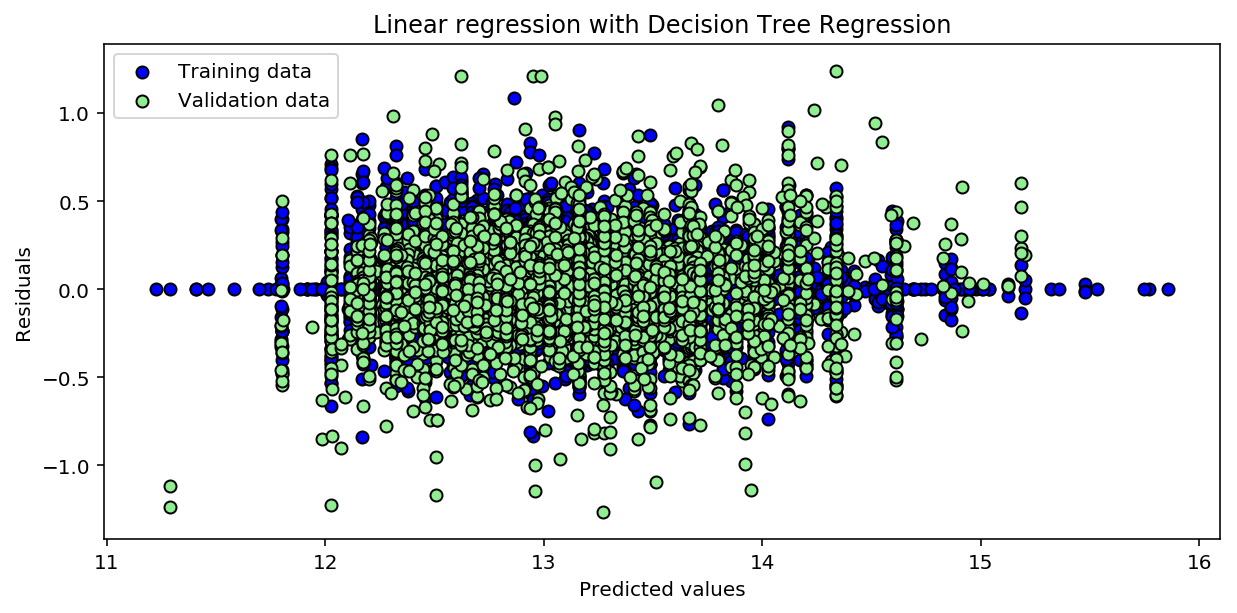

In [473]:
fig = plt.figure(figsize=(10, 10))
ax2 = plt.subplot2grid((2, 1), (0, 0))
plt.scatter(y_tree_train_pred, y_tree_train_pred - y_train, c = "blue", edgecolors='black',label = "Training data")
plt.scatter(y_tree_test_pred, y_tree_test_pred - y_test, c = "lightgreen", edgecolors='black' ,label = "Validation data")
plt.title("Linear regression with Decision Tree Regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")

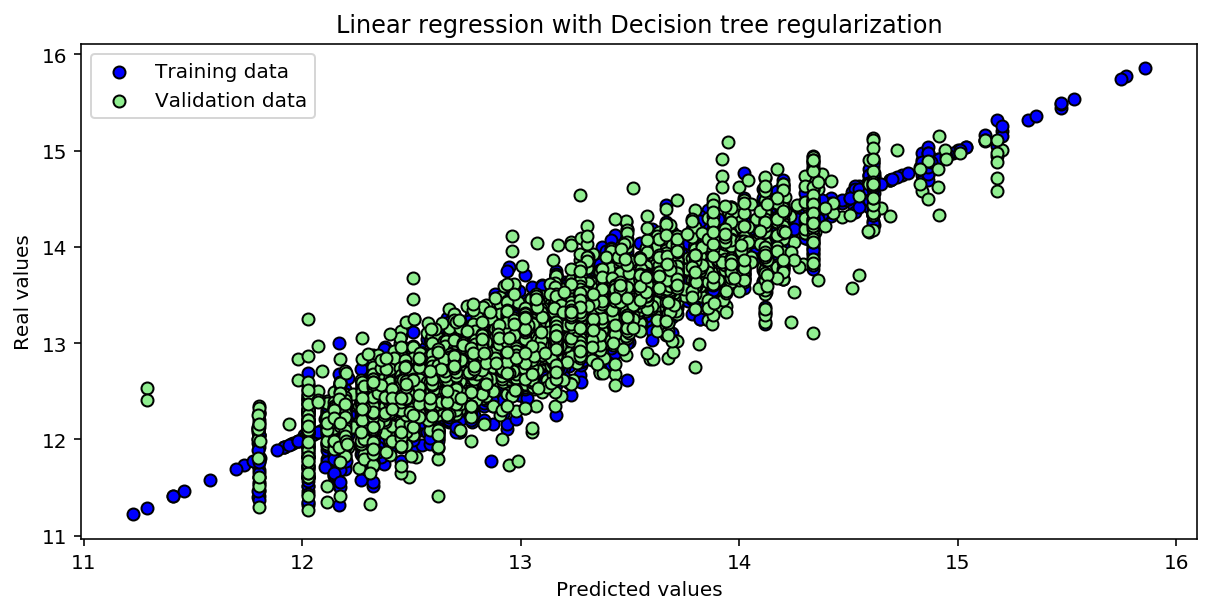

In [474]:
fig = plt.figure(figsize=(10, 10))
ax2 = plt.subplot2grid((2, 1), (0, 0))
plt.scatter(y_tree_train_pred, y_train, c = "blue", edgecolors='black', label = "Training data")
plt.scatter(y_tree_test_pred, y_test, c = "lightgreen", edgecolors='black', label = "Validation data")
plt.title("Linear regression with Decision tree regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")

In [475]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )


Best l1_ratio : 0.1
Best alpha : 0.0001


In [476]:
print("Try again for more precision with l1_ratio centered around " + str(ratio))
elasticNet = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

Try again for more precision with l1_ratio centered around 0.1
Best l1_ratio : 0.085
Best alpha : 0.0001


In [477]:
print("Now try again for more precision on alpha, with l1_ratio fixed at " + str(ratio) + 
      " and alpha centered around " + str(alpha))
elasticNet = ElasticNetCV(l1_ratio = ratio,
                          alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
                                    alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
                                    alpha * 1.35, alpha * 1.4], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )


Now try again for more precision on alpha, with l1_ratio fixed at 0.085 and alpha centered around 0.0001
Best l1_ratio : 0.085
Best alpha : 6e-05


In [478]:
y_train_ela = elasticNet.predict(X_train)
y_test_ela = elasticNet.predict(X_test)

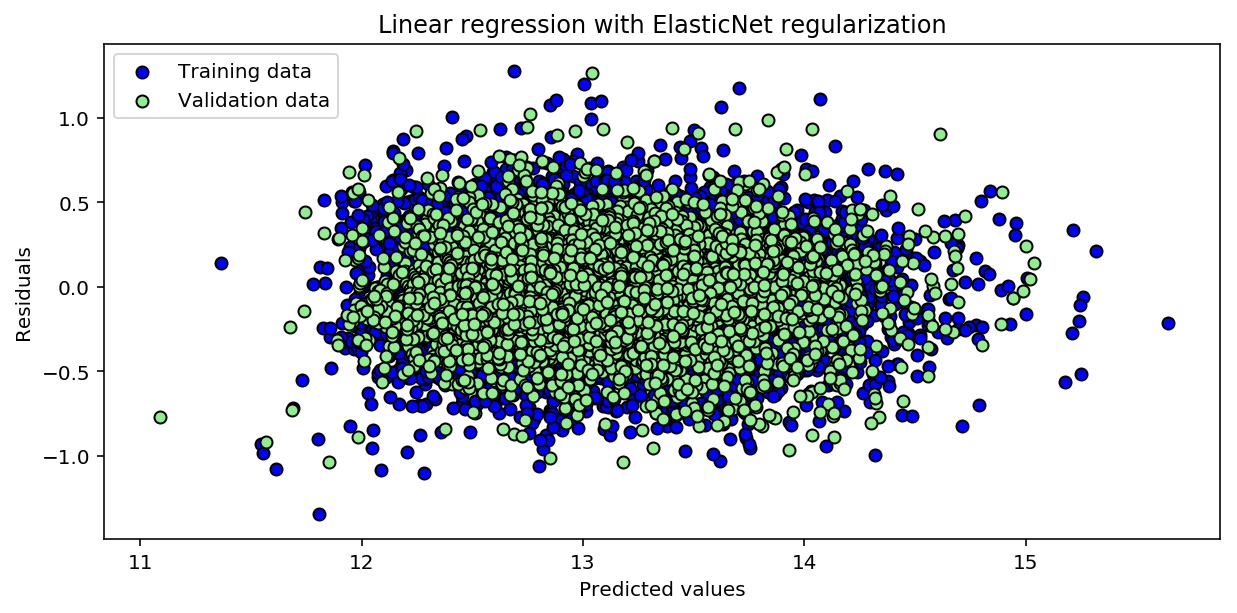

In [479]:
fig = plt.figure(figsize=(10, 10))
ax2 = plt.subplot2grid((2, 1), (0, 0))
plt.scatter(y_train_ela, y_train_ela - y_train, c = "blue", edgecolors='black',label = "Training data")
plt.scatter(y_test_ela, y_test_ela - y_test, c = "lightgreen", edgecolors='black', label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")

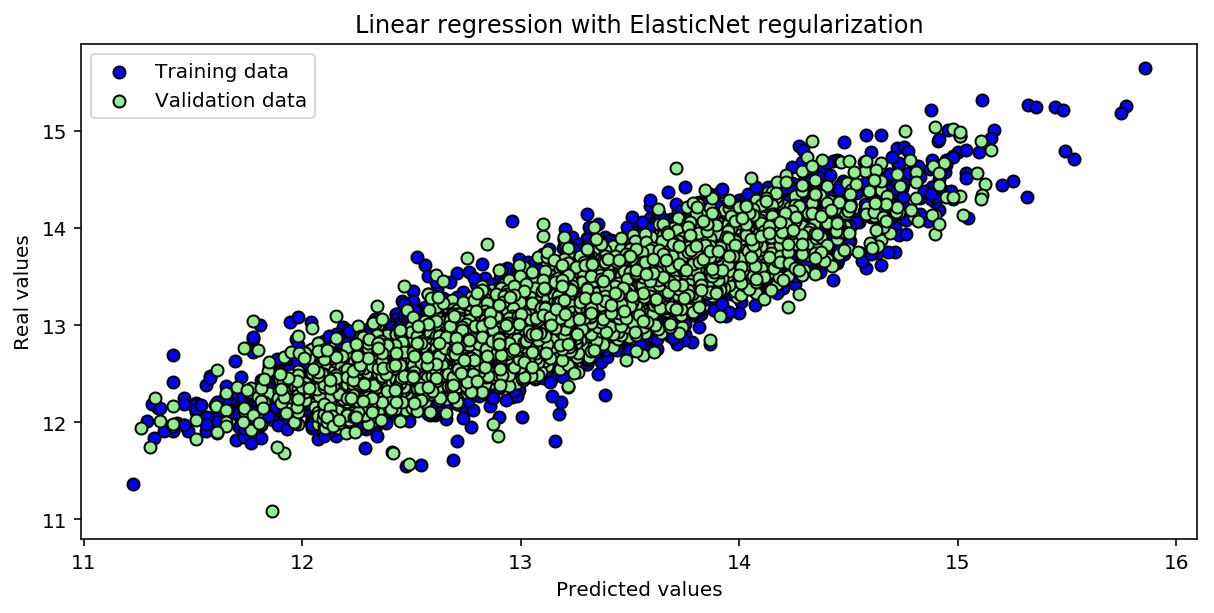

In [480]:
fig = plt.figure(figsize=(10, 10))
ax2 = plt.subplot2grid((2, 1), (0, 0))
plt.scatter(y_train, y_train_ela, c = "blue", edgecolors='black', label = "Training data")
plt.scatter(y_test, y_test_ela, c = "lightgreen", edgecolors='black', label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")

# Evaluating the best metrics obtained

## Linear Regression

In [481]:
linear.fit(X_train, y_train)

train_error, test_error = calc_metrics(X_train, X_test, y_train, y_test, linear)
linear_r2_train = r2_score(y_train, preds)
linear_r2_test = r2_score(y_test, y_test_pred)
rmse_train_error = np.sqrt(train_error)
rmse_test_error = np.sqrt(test_error)
print("Multiple Regression Training Error:", train_error)
print("\nMultiple Regression Validation Error:", test_error)
print("\nMultiple Regression Training RMSE:", rmse_train_error)
print("\nMultiple Regression Validation RMSE:", rmse_test_error)
print("\nR-squared coefficient of Training set:", linear_r2_train)
print("\nR-squared coefficient of Validation set:", linear_r2_test)

Multiple Regression Training Error: 0.059628842211892796

Multiple Regression Validation Error: 0.06050346878022587

Multiple Regression Training RMSE: 0.24419017632143353

Multiple Regression Validation RMSE: 0.2459745287224388

R-squared coefficient of Training set: 0.7850820945513663

R-squared coefficient of Validation set: 0.7805974302999449


## Ridge Regression

In [482]:
ridge.fit(X_train, y_train)

train_error, test_error = calc_metrics(X_train, X_test, y_train, y_test, ridge)
ridge_r2_train = r2_score(y_train, y_train_rdg)
ridge_r2_test = r2_score(y_test, y_test_rdg)
rmse_train_error = np.sqrt(train_error)
rmse_test_error = np.sqrt(test_error)
print("Ridge Regression Training Error:", train_error)
print("\nRidge Regression Validation Error:", test_error)
print("\nRidge Regression Training RMSE:", rmse_train_error)
print("\nRidge Regression Validation RMSE:", rmse_test_error)
print("\nR-squared coefficient of Training set:", ridge_r2_train)
print("\nR-squared coefficient of Validation set:", ridge_r2_test)

Ridge Regression Training Error: 0.05962891189284838

Ridge Regression Validation Error: 0.060502942650380996

Ridge Regression Training RMSE: 0.2441903189990307

Ridge Regression Validation RMSE: 0.24597345923977448

R-squared coefficient of Training set: 0.7850818434030216

R-squared coefficient of Validation set: 0.7805993381945241


## Lasso

In [483]:
lasso.fit(X_train, y_train)

train_error, test_error = calc_metrics(X_train, X_test, y_train, y_test, lasso)
lasso_r2_train = r2_score(y_train, y_train_las)
lasso_r2_test = r2_score(y_test, y_test_las)
rmse_train_error = np.sqrt(train_error)
rmse_test_error = np.sqrt(test_error)
print("Lasso Training Error:", train_error)
print("\nLasso Validation Error:", test_error)
print("\nLasso Training RMSE:", rmse_train_error)
print("\nLasso Validation RMSE:", rmse_test_error)
print("\nR-squared coefficient of Training set:", lasso_r2_train)
print("\nR-squared coefficient of Validation set:", lasso_r2_test)

Lasso Training Error: 0.059630399094975396

Lasso Validation Error: 0.060493163892001184

Lasso Training RMSE: 0.24419336415016563

Lasso Validation RMSE: 0.24595358076678042

R-squared coefficient of Training set: 0.785076483138521

R-squared coefficient of Validation set: 0.7806347987186959


## Decision Tree Regression

In [484]:
tree_reg.fit(X_train, y_train)

train_error, test_error = calc_metrics(X_train, X_test, y_train, y_test, tree_reg)
dtree_r2_train = r2_score(y_train, y_tree_train_pred)
dtree_r2_test = r2_score(y_test, y_tree_test_pred)
rmse_train_error = np.sqrt(train_error)
rmse_test_error = np.sqrt(test_error)
print("Dtree Training Error:", train_error)
print("\nDtree Validation Error:", test_error)
print("\nDtree Training RMSE:", rmse_train_error)
print("\nDtree Validation RMSE:", rmse_test_error)
print("\nR-squared coefficient of Training set:", dtree_r2_train)
print("\nR-squared coefficient of Validation set:", dtree_r2_test)

Dtree Training Error: 0.027263926482897834

Dtree Validation Error: 0.047502254059955513

Dtree Training RMSE: 0.16511791690454986

Dtree Validation RMSE: 0.21795011828387595

R-squared coefficient of Training set: 0.9017336953619187

R-squared coefficient of Validation set: 0.8278559757930509


## ElasticNet Regularization

In [485]:
elasticNet.fit(X_train, y_train)

train_error, test_error = calc_metrics(X_train, X_test, y_train, y_test, elasticNet)
elastic_r2_train = r2_score(y_train, y_train_ela)
elastic_r2_test = r2_score(y_test, y_test_ela)
rmse_train_error = np.sqrt(train_error)
rmse_test_error = np.sqrt(test_error)
print("Dtree Training Error:", train_error)
print("\nDtree Validation Error:", test_error)
print("\nDtree Training RMSE:", rmse_train_error)
print("\nDtree Validation RMSE:", rmse_test_error)
print("\nR-squared coefficient of Training set:", elastic_r2_train)
print("\nR-squared coefficient of Validation set:", elastic_r2_test)

Dtree Training Error: 0.05962938343894344

Dtree Validation Error: 0.0605013768601055

Dtree Training RMSE: 0.2441912845269942

Dtree Validation RMSE: 0.2459702763752269

R-squared coefficient of Training set: 0.7850801438278611

R-squared coefficient of Validation set: 0.7806050161898036


### Turns out the best regression model for this dataset belongs to Decision Tree Regression. Now that the appropriate model has been chosen, now comes the part of Hyperparameter tuning

# Hyperparamater Tuning

In [506]:
from sklearn.model_selection import GridSearchCV
max_depth = np.arange(1, 101)
max_features = ['auto', 'sqrt', 'log2']
#max_leaf_nodes = np.arange(2, 21)
#min_samples_split = np.arange(2, 51)

In [507]:
dtree_tuning = dict(max_depth=max_depth, max_features=max_features)

In [508]:
dtree = DecisionTreeRegressor()
grid = GridSearchCV(dtree, dtree_tuning, cv=10, scoring='r2')

In [509]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([  1,   2, ...,  99, 100]), 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [510]:
grid.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=9, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

# Building the Final Model using the whole dataset now 

In [537]:
dtree = DecisionTreeRegressor(max_depth=9, max_features='auto')
dtree.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=9, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [539]:
predictions = dtree.predict(X)
r2_score(y, predictions)

0.8723183982168388

In [540]:
predictions

array([12.49699174, 13.01292097, 12.10071213, ..., 12.88624022,
       12.80915472, 12.88624022])

## Obtain the Final predictions and then compare it with the dataset

In [541]:
predicted_values = np.exp(predictions)
df['predictions'] = predicted_values

In [543]:
actual = np.exp(df.price)
df['actual'] = actual

In [544]:
df

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      12.309982         3        1.0     7.073270      5650     1.0   
1      13.195614         3        2.0     7.851661      7242     2.0   
2      12.100712         2        1.0     6.646391     10000     1.0   
3      13.311329         4        3.0     7.580700      5000     1.0   
4      13.142166         3        2.0     7.426549      8080     1.0   
5      14.022525         4        4.0     8.597851    101930     1.0   
6      12.458775         3        2.0     7.447168      6819     2.0   
7      12.583995         3        2.0     6.966024      9711     1.0   
8      12.343658         3        1.0     7.484369      7470     1.0   
9      12.685408         3        2.0     7.544332      6560     2.0   
10     13.403776         3        2.0     8.177516      9796     1.0   
11     13.056224         2        1.0     7.056175      6000     1.0   
12     12.644328         3        1.0     7.265430     19901     2.0   
13     12.899220         3        2.0     7.222566      9680     1.0   
14     13.180632         5        2.0     7.501082      4850     2.0   
15     13.384728         4        3.0     7.989560      5000     2.0   
16     12.886641         3        2.0     7.544332     14040     2.0   
17     13.091904         4        1.0     7.377759      4300     2.0   
18     12.149502         2        1.0     7.090077      9850     1.0   
19     12.345835         3        1.0     7.130899      9774     1.0   
20     12.860999         4        2.0     7.390181      4980     1.0   
21     14.508658         3        3.0     8.022897     44867     1.0   
22     12.560244         5        2.0     7.727535      6300     2.0   
23     12.439958         2        2.0     6.975414      9643     1.0   
24     12.703813         3        2.0     7.803843      6500     2.0   
25     12.358794         3        2.0     7.444249      4697     2.0   
26     13.750439         3        2.0     7.803843      2691     2.0   
27     13.410545         3        1.0     7.244228      1581     2.0   
28     12.989974         3        2.0     7.326466      6380     1.0   
29     13.485617         4        2.0     7.851661      7173     2.0   
...          ...       ...        ...          ...       ...     ...   
21583  12.899095         2        1.0     6.565265      1157     2.0   
21584  12.847927         3        2.0     7.138867       900     2.0   
21585  12.506177         3        2.0     7.533694      5000     2.0   
21586  13.132314         2        2.0     7.265430      1201     3.0   
21587  12.860999         3        2.0     7.326466      1488     3.0   
21588  12.934828         2        2.0     7.098376      1278     2.0   
21589  12.758520         3        2.0     7.839919      4760     2.0   
21590  14.014361         4        4.0     8.499029      9444     2.0   
21591  13.256894         4        3.0     7.926603      3852     2.0   
21592  13.071070         3        2.0     7.081709      1200     3.0   
21593  13.901688         5        4.0     8.335671      8142     2.0   
21594  12.765688         4        3.0     7.824046      5995     2.0   
21595  13.161584         2        2.0     7.333023       981     3.0   
21596  13.429775         5        3.0     8.188689      9437     2.0   
21597  14.272935         4        3.0     8.134468     10125     2.0   
21598  13.202652         4        2.0     8.044947      7866     2.0   
21599  13.604790         4        3.0     8.291547      7838     2.0   
21600  14.247293         5        4.0     8.405144      8088     2.0   
21601  13.054085         3        2.0     7.261927      1179     3.0   
21602  12.319401         3        2.0     7.313220     11968     1.0   
21603  13.136759         3        2.0     7.727535      5536     2.0   
21604  12.969212         3        2.0     7.306531      1126     3.0   
21605  13.322337         4        2.0     7.832014      6023     2.0   
21606  13.825461         4        4.0     8.163371 